In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

print("Path to dataset files:", path)

100%|██████████| 12.4k/12.4k [00:00<00:00, 18.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/redwankarimsony/heart-disease-data/versions/6


In [2]:
import pandas as pd
import os
# Ruta de archivo CSV
file_path = os.path.join(path, 'heart_disease_uci.csv')
df = pd.read_csv(file_path)
print(df.head())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None


In [4]:
# Registros duplicados
print(df.duplicated().sum())

0


In [5]:
# Verificación de datos nulos
print(df.isnull().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [6]:
# Eliminamos columna id
df = df.drop('id', axis=1)

# Ajuste de tipos de datos
# Convertir columnas categóricas a tipo 'category'
categorical_cols = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'num']
df[categorical_cols] = df[categorical_cols].astype('category')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       920 non-null    int64   
 1   sex       920 non-null    category
 2   dataset   920 non-null    category
 3   cp        920 non-null    category
 4   trestbps  861 non-null    float64 
 5   chol      890 non-null    float64 
 6   fbs       830 non-null    category
 7   restecg   918 non-null    category
 8   thalch    865 non-null    float64 
 9   exang     865 non-null    category
 10  oldpeak   858 non-null    float64 
 11  slope     611 non-null    category
 12  ca        309 non-null    float64 
 13  thal      434 non-null    category
 14  num       920 non-null    category
dtypes: category(9), float64(5), int64(1)
memory usage: 52.6 KB
None


In [7]:
categorical_cols = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'num']
# Llenar valores nulos con la mediana para columnas numéricas
df['trestbps'].fillna(df['trestbps'].median(), inplace=True)
df['chol'].fillna(df['chol'].median(), inplace=True)
df['thalch'].fillna(df['thalch'].median(), inplace=True)
df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)

# Llenar valores nulos con la moda para columnas categóricas
df['fbs'].fillna(df['fbs'].mode()[0], inplace=True)
df['restecg'].fillna(df['restecg'].mode()[0], inplace=True)
df['exang'].fillna(df['exang'].mode()[0], inplace=True)
df['slope'].fillna(df['slope'].mode()[0], inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)

# Para 'ca', consideramos imputar con la mediana ya que es numérica
df['ca'].fillna(df['ca'].median(), inplace=True)

# Verificar nuevamente valores nulos
print("Valores nulos después de la imputación adicional:")
print(df.isnull().sum())

Valores nulos después de la imputación adicional:
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


<ipython-input-7-7ded1e397f8f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['trestbps'].fillna(df['trestbps'].median(), inplace=True)
<ipython-input-7-7ded1e397f8f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [8]:
# Detección de outliers
numeric_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
total_outliers = 0
for column in numeric_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    total_outliers += len(outliers)
    print(f"Outliers en '{column}' = {len(outliers)}")
print(f"\nTotal de outliers = {total_outliers}")

Outliers en 'age' = 0
Outliers en 'trestbps' = 28
Outliers en 'chol' = 185
Outliers en 'thalch' = 2
Outliers en 'oldpeak' = 16
Outliers en 'ca' = 128

Total de outliers = 359


Análisis Exploratorio de Datos

In [12]:
print(df.describe())

              age    trestbps        chol      thalch     oldpeak          ca
count  920.000000  920.000000  920.000000  920.000000  920.000000  920.000000
mean    53.510870  131.995652  199.908696  137.692391    0.853261    0.227174
std      9.424685   18.451300  109.040171   25.145235    1.058049    0.628936
min     28.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.000000  120.000000  177.750000  120.000000    0.000000    0.000000
50%     54.000000  130.000000  223.000000  140.000000    0.500000    0.000000
75%     60.000000  140.000000  267.000000  156.000000    1.500000    0.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    3.000000


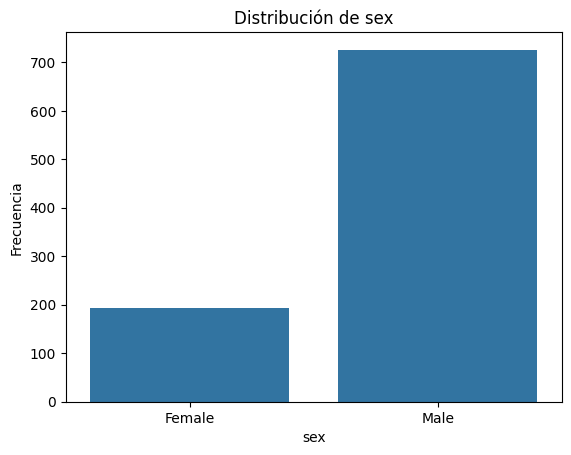

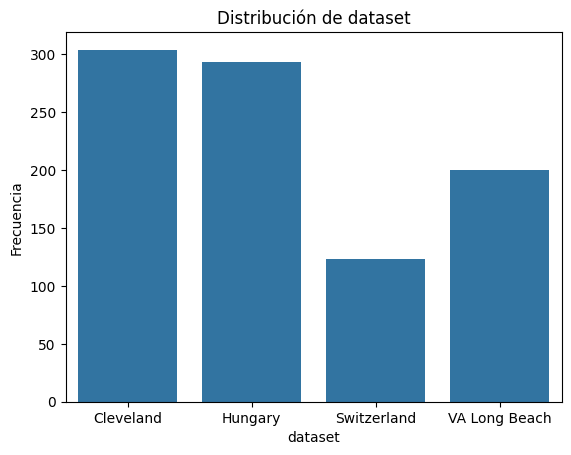

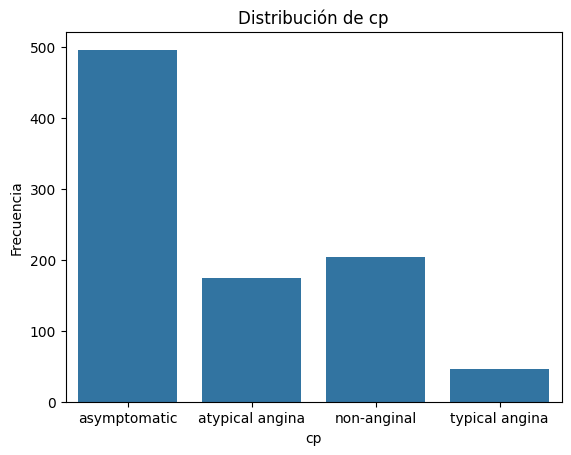

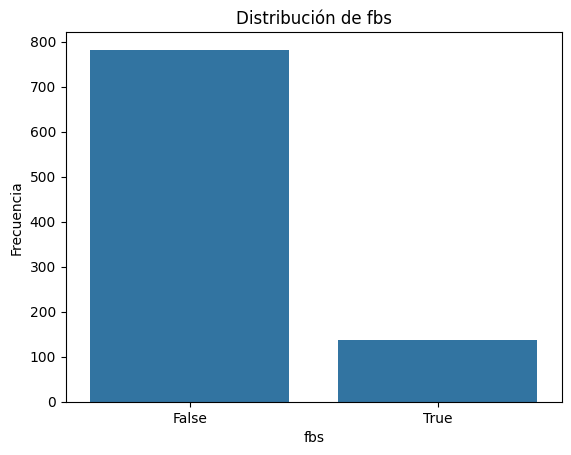

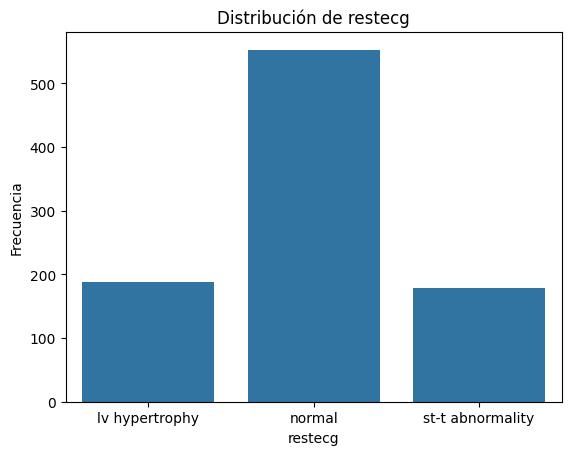

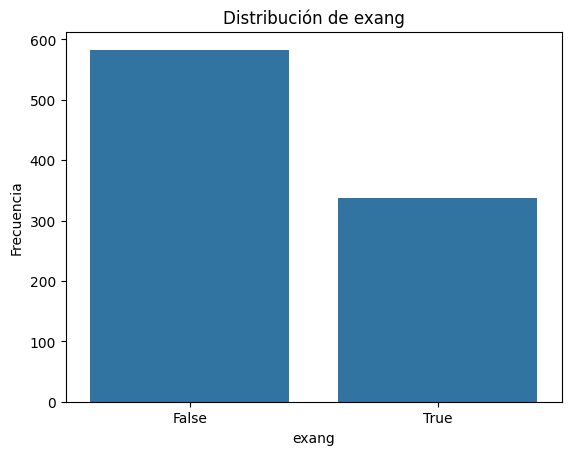

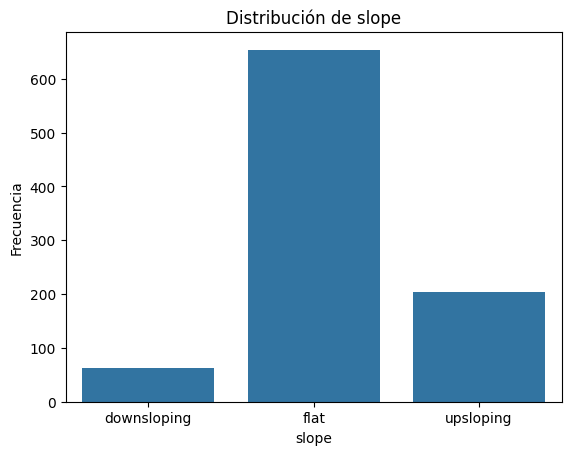

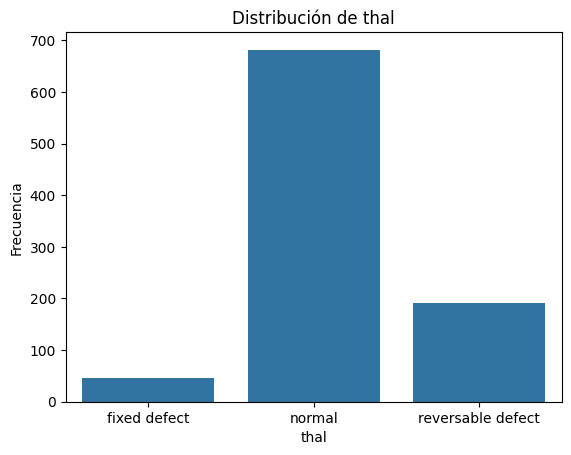

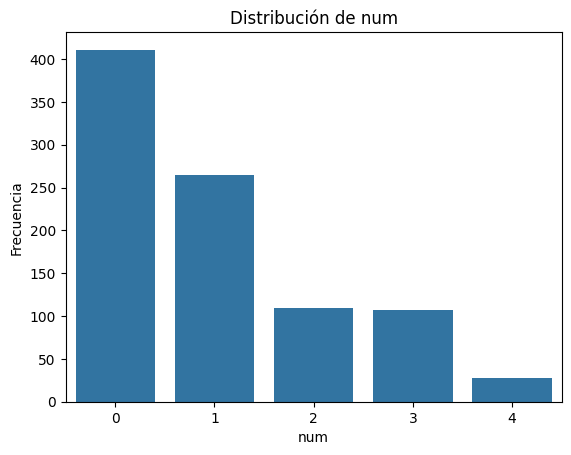

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráficos de barras para variables categóricas
categorical_cols = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'num']
for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

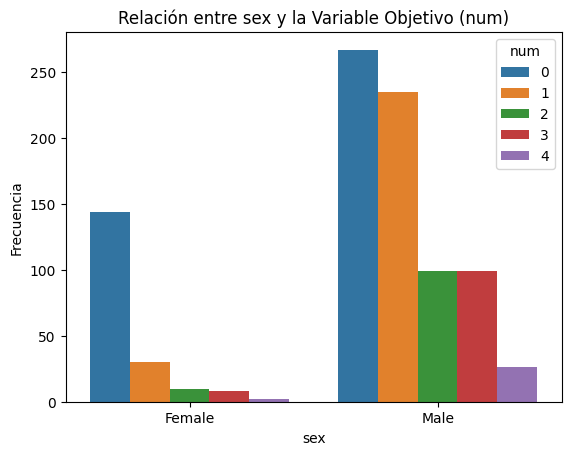

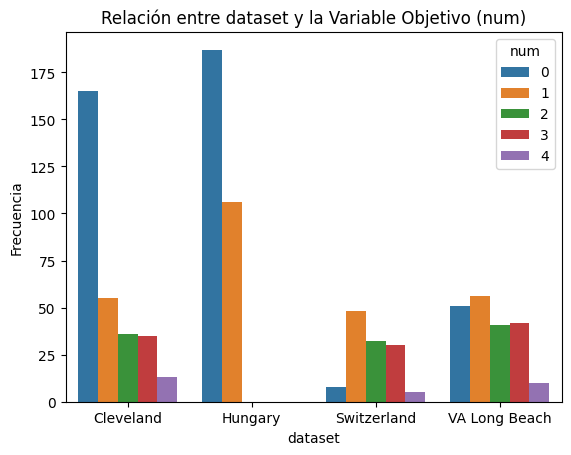

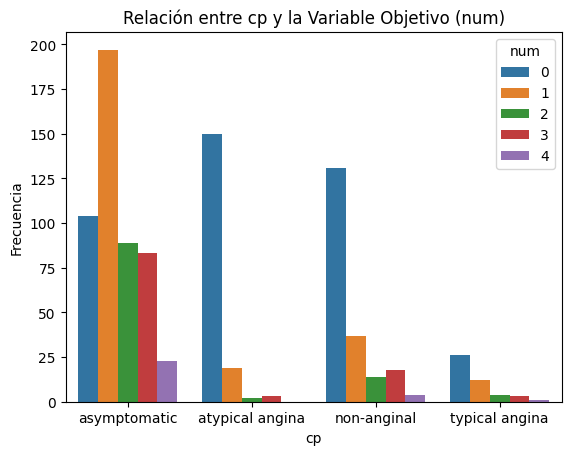

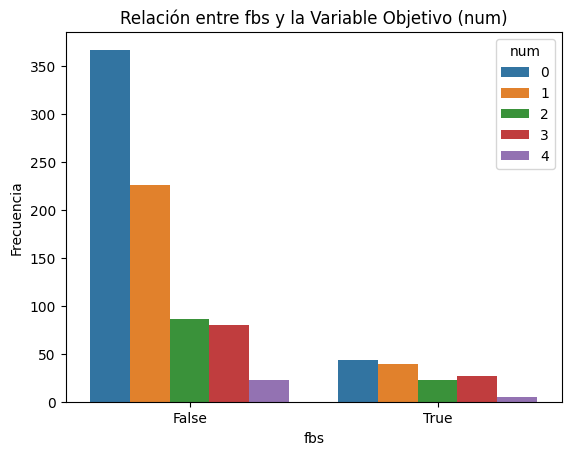

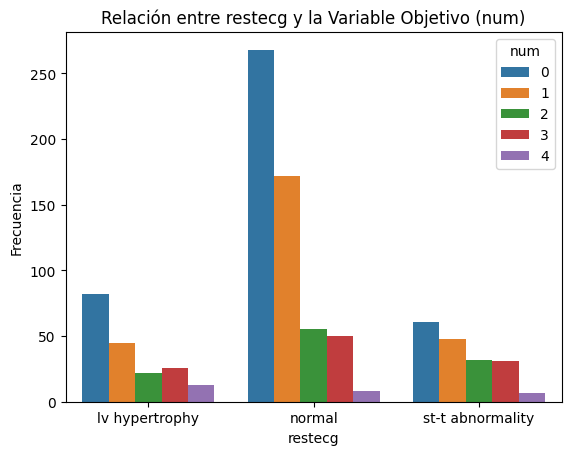

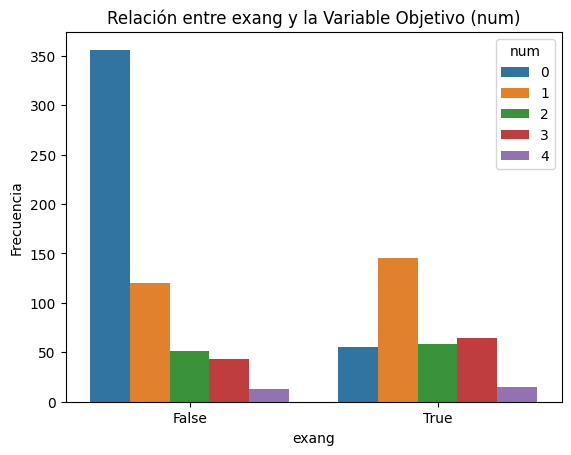

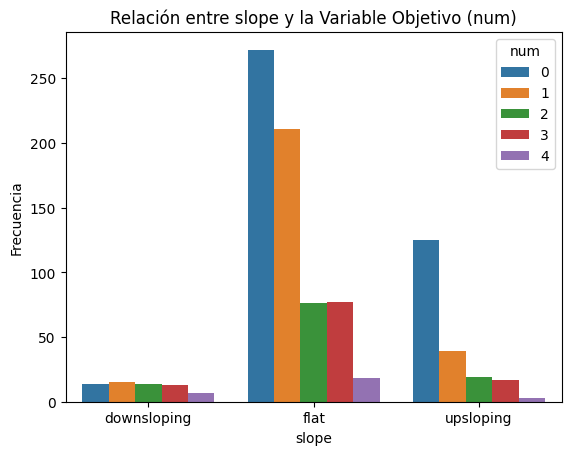

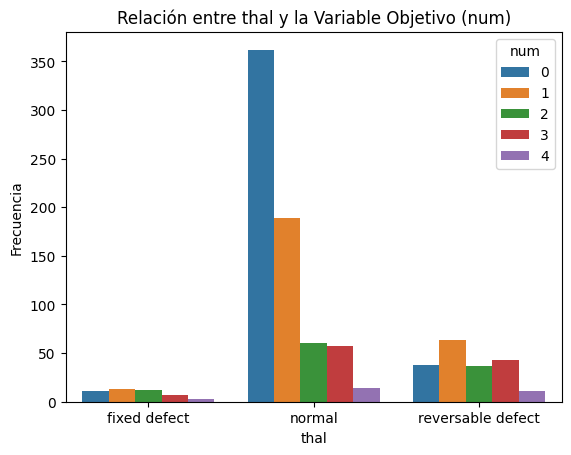

In [15]:
# Gráficos de barras para ver la relación entre variables categóricas y la variable objetivo
for col in categorical_cols[:-1]:
    sns.countplot(x=col, hue='num', data=df)
    plt.title(f'Relación entre {col} y la Variable Objetivo (num)')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

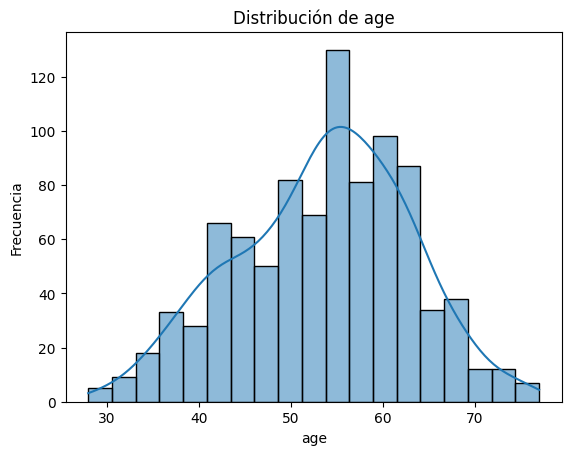

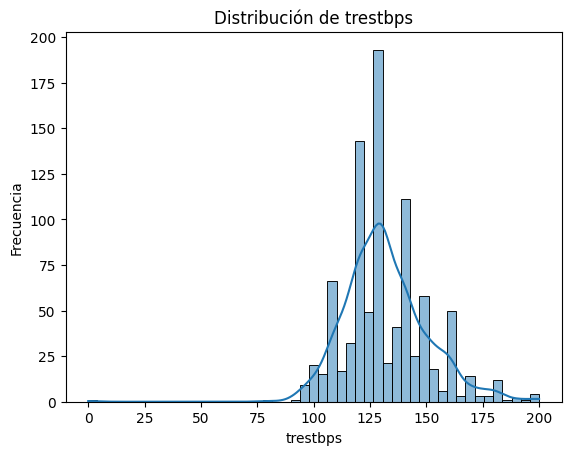

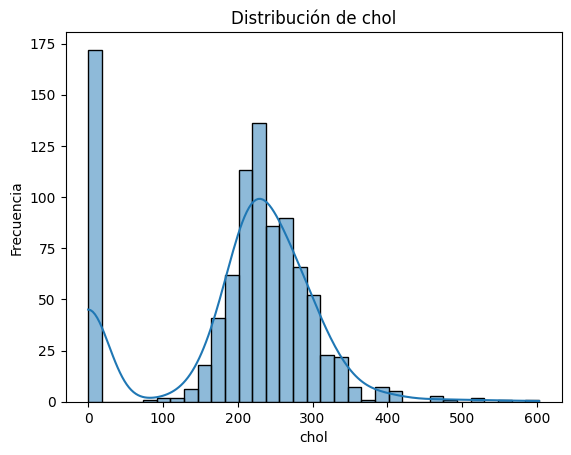

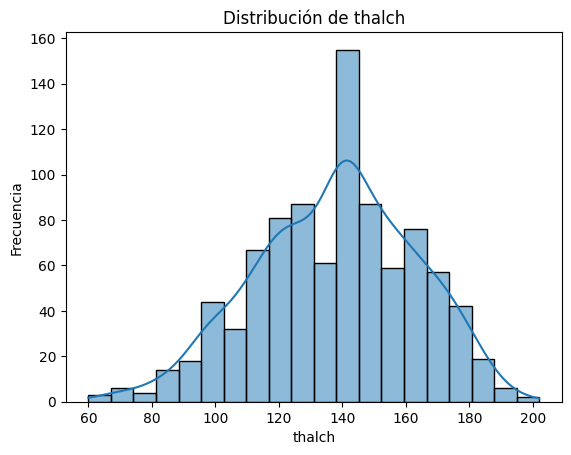

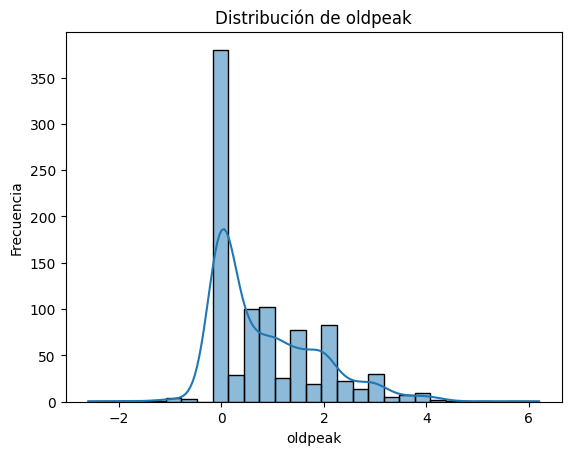

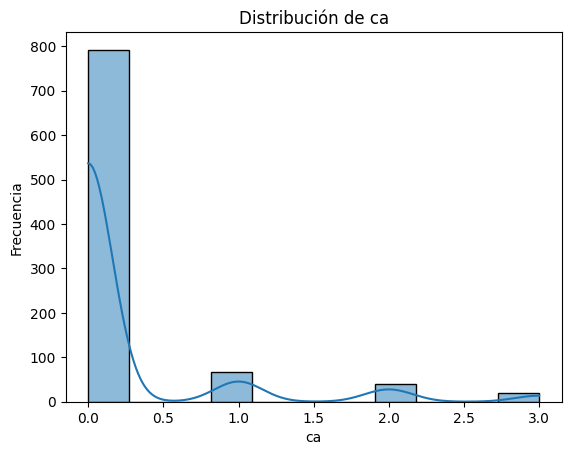

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns

# Histogramas para variables numéricas
for col in numeric_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

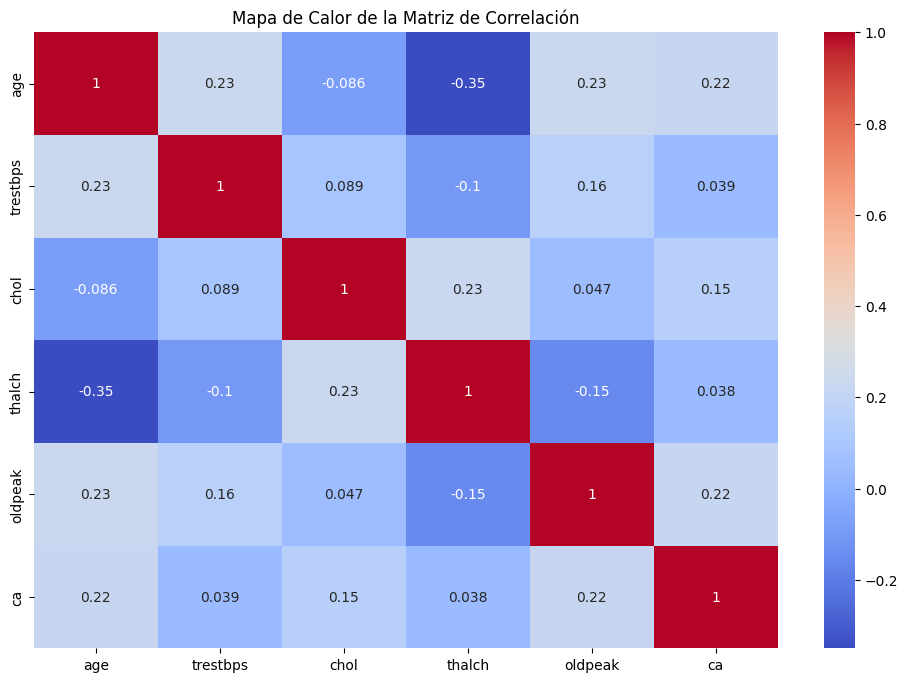

In [17]:
# Mapa de calor de la matriz de correlación
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

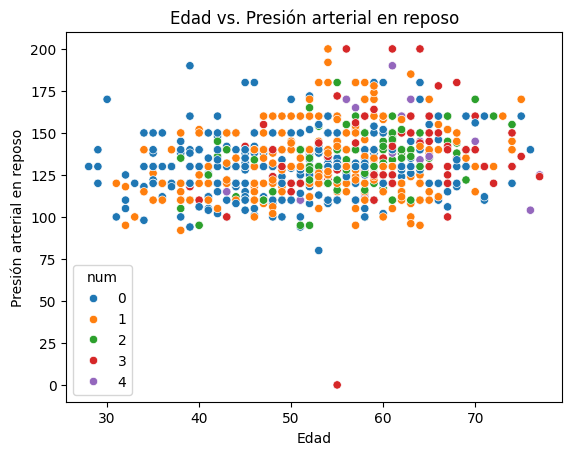

In [18]:
# Gráfico de dispersión entre Edad y Presión arterial en reposo
sns.scatterplot(data=df, x='age', y='trestbps', hue='num')
plt.title('Edad vs. Presión arterial en reposo')
plt.xlabel('Edad')
plt.ylabel('Presión arterial en reposo')
plt.show()

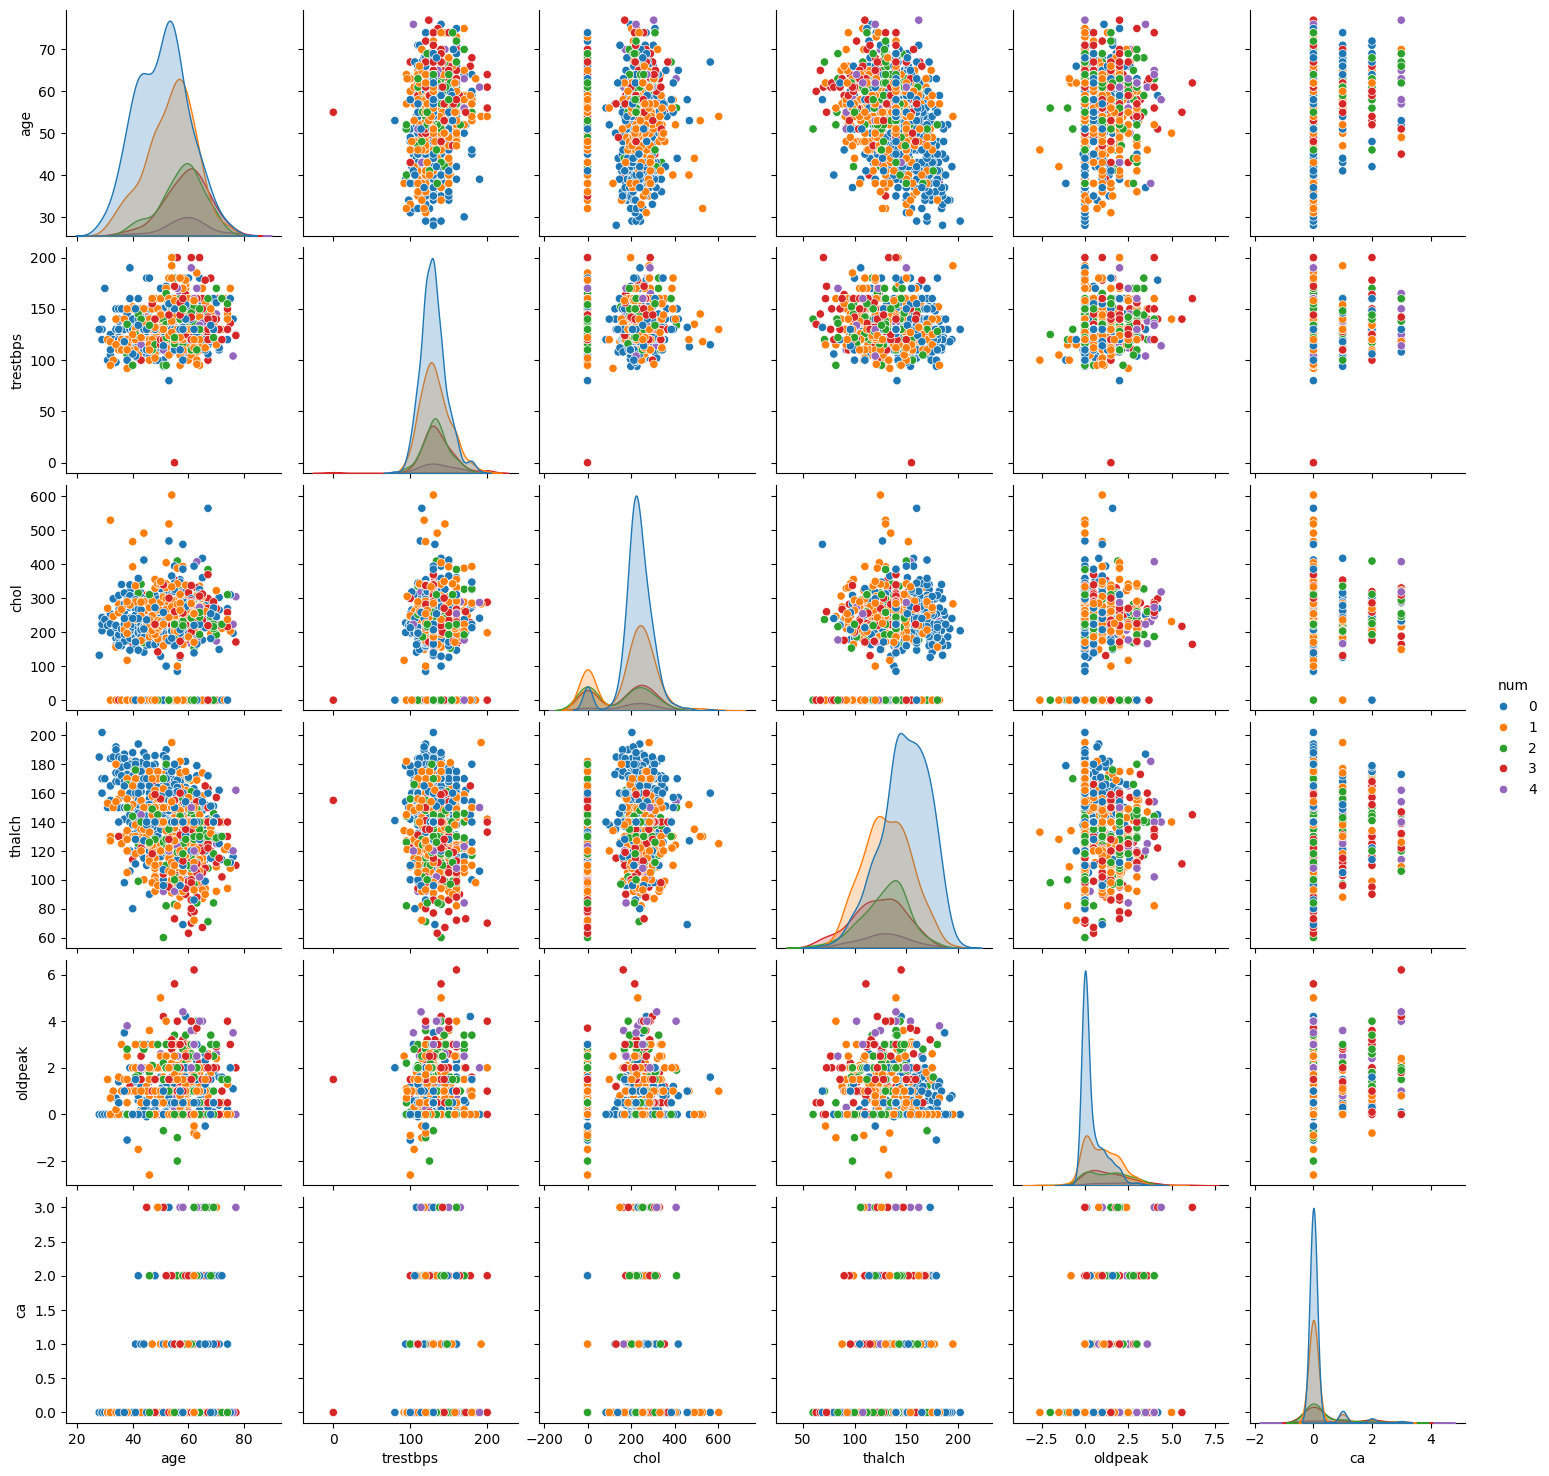

In [19]:
# Gráficos de dispersión para identificar relaciones entre variables numéricas y la variable objetivo
sns.pairplot(df, hue='num', vars=numeric_cols)
plt.show()

In [20]:
# Verificación final de valores nulos
print("Valores nulos después de llenar:")
print(df.isnull().sum())

# Verificación final de outliers
print("\nVerificación de outliers:")
for column in numeric_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Outliers en '{column}' = {len(outliers)}")
    print(f"Valores atípicos en '{column}' = {len(outliers) / len(df) * 100:.2f}%\n")

Valores nulos después de llenar:
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Verificación de outliers:
Outliers en 'age' = 0
Valores atípicos en 'age' = 0.00%

Outliers en 'trestbps' = 28
Valores atípicos en 'trestbps' = 3.04%

Outliers en 'chol' = 185
Valores atípicos en 'chol' = 20.11%

Outliers en 'thalch' = 2
Valores atípicos en 'thalch' = 0.22%

Outliers en 'oldpeak' = 16
Valores atípicos en 'oldpeak' = 1.74%

Outliers en 'ca' = 128
Valores atípicos en 'ca' = 13.91%



In [21]:
# Eliminamos los outliers de 'thalch', 'trestbps' y 'ca' porque son pocos

def remove_outliers_specific(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Eliminar outliers en las columnas 'thalch' y 'ca'
outlier_columns = ['thalch', 'trestbps', 'ca']
df_cleaned = remove_outliers_specific(df, outlier_columns)

# Verificación de la eliminación de outliers
print("Verificación de outliers después de la eliminación:")
for column in outlier_columns:
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_cleaned[(df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)]
    print(f"Outliers en '{column}' = {len(outliers)}")

# Verificación final de valores nulos y tipos de datos
print("Valores nulos después de la eliminación de outliers:")
print(df_cleaned.isnull().sum())
print("\nTipos de datos:")
print(df_cleaned.dtypes)

Verificación de outliers después de la eliminación:
Outliers en 'thalch' = 1
Outliers en 'trestbps' = 0
Outliers en 'ca' = 0
Valores nulos después de la eliminación de outliers:
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Tipos de datos:
age            int64
sex         category
dataset     category
cp          category
trestbps     float64
chol         float64
fbs         category
restecg     category
thalch       float64
exang       category
oldpeak      float64
slope       category
ca           float64
thal        category
num         category
dtype: object


Procesamiento de Datos

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar características y la variable objetivo
X = df_cleaned.drop(columns='num')
y = df_cleaned['num']

# Codificar variables categóricas utilizando One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)

# Escalar características numéricas
scaler = StandardScaler()
numeric_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos de datos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (612, 21)
Tamaño del conjunto de prueba: (153, 21)


In [23]:
#XGBoost

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# Entrenar el modelo de XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = xgb_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Precisión: {accuracy}')
print('\nMatriz de Confusión:')
print(conf_matrix)
print('\nReporte de Clasificación:')
print(class_report)

Precisión: 0.5882352941176471

Matriz de Confusión:
[[62 12  0  3  0]
 [10 22  8  3  0]
 [ 0  7  3  5  1]
 [ 2  4  5  3  1]
 [ 0  0  0  2  0]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        77
           1       0.49      0.51      0.50        43
           2       0.19      0.19      0.19        16
           3       0.19      0.20      0.19        15
           4       0.00      0.00      0.00         2

    accuracy                           0.59       153
   macro avg       0.34      0.34      0.34       153
weighted avg       0.60      0.59      0.59       153



In [26]:
#Optimización de Hiperparámetros

# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=XGBClassifier(random_state=42, objective='multi:softmax', num_class=5), # Agregar objective='multi:softmax' and num_class
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1)

# Asegurarse que y_train tenga la forma correcta
y_train = y_train.values.ravel()

# Entrenar con búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
best_params = grid_search.best_params_
print(f'Mejores parámetros: {best_params}')

# Predicciones con el mejor modelo
y_pred_optimized = grid_search.predict(X_test)

# Evaluar el rendimiento del modelo optimizado
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)
class_report_optimized = classification_report(y_test, y_pred_optimized)

print(f'Precisión del modelo optimizado: {accuracy_optimized}')
print('Matriz de Confusión del modelo optimizado:')
print(conf_matrix_optimized)
print('Reporte de Clasificación del modelo optimizado:')
print(class_report_optimized)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


KeyboardInterrupt: 